In [1]:
# importing important libraries
import matplotlib as plt
%matplotlib inline
import numpy as np
from sklearn import mixture
import pandas as pd
import seaborn as sns

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Reading in the Data

In [3]:
pass_attempt_df_corners = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/corners_pass_attempts_man_zone_gmm_features_no_rushers.csv")
pass_attempt_df_corners.shape

(52977, 157)

In [4]:
pass_attempt_df_safeties = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/safeties_pass_attempts_man_zone_gmm_features_no_rushers.csv")
pass_attempt_df_safeties.shape

(32496, 157)

In [5]:
pass_attempt_df = pd.concat([pass_attempt_df_corners,
                             pass_attempt_df_safeties])

In [6]:
pass_attempt_df.shape

(85473, 157)

In [7]:
sacks_df_corners = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/corners_sacks_man_zone_gmm_features_no_rushers.csv")
sacks_df_corners.shape

(3796, 98)

In [8]:
sacks_df_safeties = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/safeties_sacks_man_zone_gmm_features_no_rushers.csv")
sacks_df_safeties.shape

(2312, 98)

In [9]:
sacks_df = pd.concat([sacks_df_corners,
                      sacks_df_safeties]).dropna()
sacks_df.shape

(6107, 98)

In [10]:
# printing the number of weeks of data available
np.unique(pass_attempt_df['week'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

# Clustering Pass Attempt Coverage

In [11]:
filter_col = [col for col in pass_attempt_df if not '_o_' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [12]:
filter_col = [col for col in pass_attempt_df if not 'facing' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [13]:
filter_col = [col for col in pass_attempt_df if not 'var_y' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [14]:
filter_col = [col for col in pass_attempt_df if not 'var_x' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [15]:
filter_col = [col for col in pass_attempt_df if not 'def_mean_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [16]:
filter_col = [col for col in pass_attempt_df if not 'def' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [17]:
filter_col = [col for col in pass_attempt_df if not 'def_var_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [18]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'speed_var_time_0', 'speed_var_time_0_1', 'speed_var_time_1',
       'speed_var_time_1_2',
       ...
       'best_cor_y_time_0', 'best_cor_y_time_0_1', 'best_cor_y_time_1',
       'best_cor_y_time_1_2', 'best_cor_y_time_2', 'best_cor_x_y_avg_time_0',
       'best_cor_x_y_avg_time_0_1', 'best_cor_x_y_avg_time_1',
       'best_cor_x_y_avg_time_1_2', 'best_cor_x_y_avg_time_2'],
      dtype='object', length=105)

In [19]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('best' not in col) and ('s' not in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [20]:
filter_col = [col for col in pass_attempt_df if not (('cor_rot' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [21]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('time_0' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [22]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('time_2' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [23]:
# filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('x_y' not in col))]
# pass_attempt_df = pass_attempt_df[filter_col]

In [24]:
filter_col = [col for col in pass_attempt_df if not 'off_dir_var_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [25]:
filter_col = [col for col in pass_attempt_df if not 'speed' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [26]:
pass_attempt_df = pass_attempt_df.drop(['cb_off_dir_diff_ball_snap', 'cb_off_dist_ball_snap',
                                       'off_dir_mean_time_0', 'cb_off_dist_pass_forward',
                                       'off_mean_between_ball_snap_and_pass_forward'], axis = 1)

In [27]:
filter_col = [col for col in pass_attempt_df if (not 'rat' in col)|('ratio_pass_forward' in col)]
pass_attempt_df = pass_attempt_df[filter_col]

In [28]:
# filter_col = [col for col in pass_attempt_df if (not 'best' in col)]
# pass_attempt_df = pass_attempt_df[filter_col]

In [29]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_var_time_1_2', 'off_var_time_2', 'off_mean_time_0',
       'off_mean_time_0_1', 'off_mean_time_1', 'off_mean_time_1_2',
       'off_mean_time_2', 'off_dir_var_time_1', 'off_dir_var_time_1_2',
       'off_dir_var_time_2', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'off_dir_mean_time_1_2', 'off_dir_mean_time_2', 'cor_s_time_1',
       'cor_s_time_1_2', 'ratio_pass_forward', 'cb_off_dir_diff_pass_forward',
       'off_dir_diff_between_ball_snap_and_pass_forward', 'best_cor_x_time_1',
       'best_cor_x_time_1_2', 'best_cor_y_time_1', 'best_cor_y_time_1_2',
       'best_cor_x_y_avg_time_1', 'best_cor_x_y_avg_time_1_2'],
      dtype='object')

In [30]:
pass_attempt_df["cor_dist_inter"] = (pass_attempt_df["best_cor_x_y_avg_time_1"]**2)/pass_attempt_df["off_mean_time_1"]
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].fillna(0)
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].replace([np.inf], \
                np.percentile(np.array(pass_attempt_df["cor_dist_inter"]), 99))
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].replace([-np.inf], \
                np.percentile(np.array(pass_attempt_df["cor_dist_inter"]), 1))

In [31]:
pass_attempt_df.head(10)

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,ratio_pass_forward,cb_off_dir_diff_pass_forward,off_dir_diff_between_ball_snap_and_pass_forward,best_cor_x_time_1,best_cor_x_time_1_2,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,cor_dist_inter
0,1,2018090600,75,2552689,Ronald Darby,CB,0.000307,2.126595,2.334991,6.760635,...,1.003735,0.69,10.00,0.991059,0.996693,0.996152,0.992656,0.993605,0.994675,0.136746
1,1,2018090600,75,2555383,Jalen Mills,CB,0.001680,2.051115,2.075317,1.658779,...,0.535486,20.40,11.75,0.991839,0.969084,0.893204,0.945554,0.942522,0.957319,0.154773
2,1,2018090600,146,2552689,Ronald Darby,CB,0.000479,1.310370,1.533356,2.695306,...,0.285235,14.63,8.41,0.998055,0.998745,0.995289,0.996726,0.996672,0.997735,0.140171
3,1,2018090600,146,2555383,Jalen Mills,CB,0.000957,0.967793,1.170710,3.954483,...,1.104717,129.71,9.22,0.990084,0.508795,0.853983,0.943507,0.922033,0.726151,0.110491
4,1,2018090600,146,2557958,Sidney Jones,CB,0.123231,1.930732,1.270966,1.080767,...,0.897810,9.97,64.66,0.360666,0.800361,0.975222,0.984590,0.667944,0.892476,0.177724
5,1,2018090600,168,2552689,Ronald Darby,CB,0.000187,1.283342,1.408920,1.355697,...,1.804993,32.74,6.78,0.999594,0.999047,0.524308,0.946714,0.761951,0.972880,0.072567
6,1,2018090600,168,2555383,Jalen Mills,CB,0.127870,1.272338,0.430823,1.508115,...,0.533327,25.69,5.44,0.936665,0.956103,0.931165,0.995562,0.933915,0.975832,0.144012
7,1,2018090600,168,2557958,Sidney Jones,CB,0.865792,1.053149,1.171440,1.094309,...,0.554019,154.82,94.51,0.992267,0.505462,0.964629,0.963594,0.978448,0.734528,0.277880
8,1,2018090600,190,2552689,Ronald Darby,CB,0.000018,1.984624,1.805685,1.756160,...,0.489154,36.33,2.56,0.996114,0.793176,0.998201,0.947689,0.997157,0.870432,0.139959
9,1,2018090600,190,2555383,Jalen Mills,CB,0.079316,15.335604,17.552694,21.155270,...,4.408636,15.83,146.68,0.856998,0.631509,0.676553,0.518507,0.766775,0.575008,0.052792


In [32]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_var_time_1_2', 'off_var_time_2', 'off_mean_time_0',
       'off_mean_time_0_1', 'off_mean_time_1', 'off_mean_time_1_2',
       'off_mean_time_2', 'off_dir_var_time_1', 'off_dir_var_time_1_2',
       'off_dir_var_time_2', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'off_dir_mean_time_1_2', 'off_dir_mean_time_2', 'cor_s_time_1',
       'cor_s_time_1_2', 'ratio_pass_forward', 'cb_off_dir_diff_pass_forward',
       'off_dir_diff_between_ball_snap_and_pass_forward', 'best_cor_x_time_1',
       'best_cor_x_time_1_2', 'best_cor_y_time_1', 'best_cor_y_time_1_2',
       'best_cor_x_y_avg_time_1', 'best_cor_x_y_avg_time_1_2',
       'cor_dist_inter'],
      dtype='object')

### Preparing Train/Test Groups

In [33]:
weeks_exclude = [1, 2, 3]
train = pass_attempt_df[[x not in weeks_exclude for x in list(pass_attempt_df["week"])]]
test = pass_attempt_df[[x in weeks_exclude for x in list(pass_attempt_df["week"])]]

In [34]:
X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1).sample(40000)
X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

In [35]:
print(X_train.shape)
print(X_test.shape)

(40000, 29)
(15732, 29)


### Fitting GMM Model

In [36]:
# train
clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_train = clf_train.fit(X_train)

In [37]:
# test
clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_test = clf_test.fit(X_test)

### Examining Cluster Results

In [38]:
def get_cluster_means(X, f):
    cluster_means = {}
    for iCnt in range(len(X.columns)):
        cluster_means.update({X.columns[iCnt]:(f.means_[0][iCnt],f.means_[1][iCnt])})
    return cluster_means

In [39]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.9867979333629607, 0.8496551943756164),
 'best_cor_x_time_1_2': (0.9851813619653677, 0.8153505112031381),
 'best_cor_x_y_avg_time_1': (0.96026099329247, 0.8253456892345122),
 'best_cor_x_y_avg_time_1_2': (0.9622072488114491, 0.8147574831824143),
 'best_cor_y_time_1': (0.9337240529305187, 0.8010361834320572),
 'best_cor_y_time_1_2': (0.9392331350948709, 0.8141644560013953),
 'cb_off_dir_diff_pass_forward': (14.408746616220892, 49.31472458294711),
 'cor_dist_inter': (0.27842507205747646, 0.128883669806648),
 'cor_s_time_1': (0.915851141384579, 0.6987628975867425),
 'cor_s_time_1_2': (0.8620627254868348, 0.5989190475453885),
 'off_dir_diff_between_ball_snap_and_pass_forward': (16.747720982331593,
  48.23289549840175),
 'off_dir_mean_time_0_1': (42.61000418752303, 62.444235065526094),
 'off_dir_mean_time_1': (26.246118216691137, 54.156821635786876),
 'off_dir_mean_time_1_2': (23.811978216256012, 54.3439179976555),
 'off_dir_mean_time_2': (17.248945655516593, 55.5115

### Computing Rand Index

In [40]:
from sklearn.metrics import adjusted_rand_score

In [41]:
y_train = f_train.predict(X_test)
y_test = f_test.predict(X_test)

In [42]:
adjusted_rand_score(y_train, y_test)

0.9604772066361484

### Iterating Through To Get Cross-Validation Scores

In [43]:
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
G_vect = [2, 3, 4, 5, 6, 7, 8, 9]
rand_index_G_vect = []

In [44]:
for G in G_vect:
    rand_index_sum = 0
    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = pass_attempt_df[[x not in weeks_exclude for x in list(pass_attempt_df["week"])]].sample(40000)
        test = pass_attempt_df[[x in weeks_exclude for x in list(pass_attempt_df["week"])]]

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=G, covariance_type='full', 
                                            n_init = 2, max_iter = 200)
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=G, covariance_type='full',
                                           n_init = 2, max_iter = 200)
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_G_vect.append(rand_index)
    
    print(rand_index)

0.9034715169075862


KeyboardInterrupt: 

### Plot eliminating x/y var, speed, and def based variables, replacing Ratio with Cor

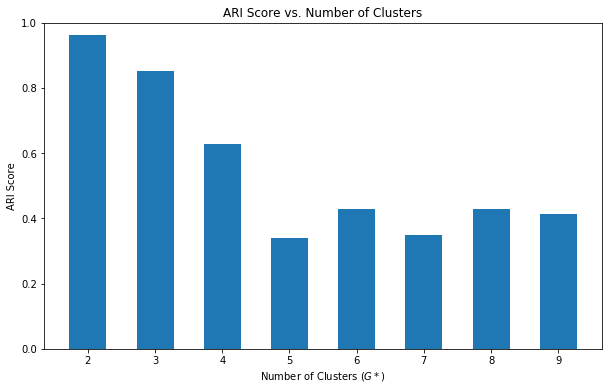

In [40]:
plt.pyplot.figure(figsize=(10, 6))
# plotting the results
plt.pyplot.bar(x = G_vect,
               height = rand_index_G_vect,
               width = .55)
plt.pyplot.xlabel('Number of Clusters ($G*$)')
plt.pyplot.ylabel('ARI Score')
plt.pyplot.ylim(0,1)
plt.pyplot.title('ARI Score vs. Number of Clusters')
plt.pyplot.show()

### Feature Importance

In [41]:
import sys
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
feature_list = list(X_train.columns)
rand_index_vect = []

# making a waitbar
toolbar_width = len(feature_list)

In [42]:
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1))

for feature in feature_list:
    
    rand_index_sum = 0

    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = pass_attempt_df[[x not in weeks_exclude for \
                                 x in list(pass_attempt_df["week"])]].drop([feature], axis = 1)
        test = pass_attempt_df[[x in weeks_exclude for \
                                x in list(pass_attempt_df["week"])]].drop([feature], axis = 1)

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_vect.append(rand_index)
    
    sys.stdout.write("-")
    sys.stdout.flush()

[                            -----------------------------

In [43]:
d = {'feature': feature_list, 'delta_ARI': rand_index_G_vect[0] - np.array(rand_index_vect)}
feature_imp_df = pd.DataFrame(data=d).sort_values('delta_ARI', ascending = False)
feature_imp_df["base_feature"] = [x.split('_pass_forward')[0] if "pass_forward" in x \
                                  else x.split('_ball_snap')[0] if "ball_snap" in x \
                                  else x.split('_time')[0] for x in np.array(feature_imp_df["feature"])]
feature_imp_df["time_period"] = ["Before Ball Thrown" if "pass_forward" in x \
                                 else "Before Ball Thrown" if "ball_snap" in x \
                                 else "After Ball Thrown" if x.endswith("2") \
                                 else "Before Ball Thrown" for x in np.array(feature_imp_df["feature"])]
feature_imp_df["feature"] = [x.upper() for x in feature_imp_df["feature"]]

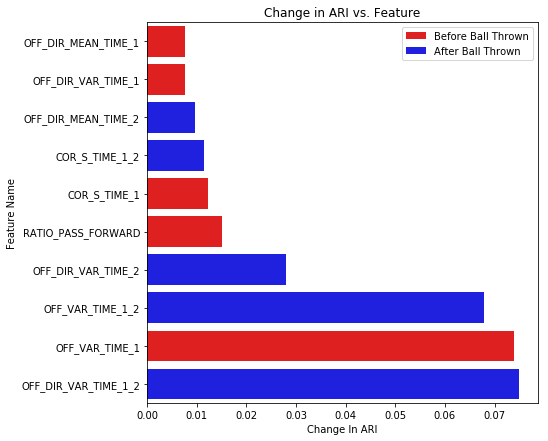

In [44]:
plt.pyplot.figure(figsize=(7,7))

sns.barplot(x="delta_ARI", y="feature", data=feature_imp_df.head(10).sort_values('delta_ARI', ascending = True),
            hue = "time_period", dodge = False, palette = ["red", "blue"])
plt.pyplot.gca().legend().set_title('')
plt.pyplot.title('Change in ARI vs. Feature')
plt.pyplot.ylabel('Feature Name')
plt.pyplot.xlabel('Change In ARI')
plt.pyplot.show()

### Scoring All Plays

In [52]:
pass_attempt_df

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,ratio_pass_forward,cb_off_dir_diff_pass_forward,off_dir_diff_between_ball_snap_and_pass_forward,best_cor_x_time_1,best_cor_x_time_1_2,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,cor_dist_inter
0,1,2018090600,75,2552689,Ronald Darby,CB,0.000307,2.126595,2.334991,6.760635,...,1.003735,0.69,10.00,0.991059,0.996693,0.996152,0.992656,0.993605,0.994675,0.136746
1,1,2018090600,75,2555383,Jalen Mills,CB,0.001680,2.051115,2.075317,1.658779,...,0.535486,20.40,11.75,0.991839,0.969084,0.893204,0.945554,0.942522,0.957319,0.154773
2,1,2018090600,146,2552689,Ronald Darby,CB,0.000479,1.310370,1.533356,2.695306,...,0.285235,14.63,8.41,0.998055,0.998745,0.995289,0.996726,0.996672,0.997735,0.140171
3,1,2018090600,146,2555383,Jalen Mills,CB,0.000957,0.967793,1.170710,3.954483,...,1.104717,129.71,9.22,0.990084,0.508795,0.853983,0.943507,0.922033,0.726151,0.110491
4,1,2018090600,146,2557958,Sidney Jones,CB,0.123231,1.930732,1.270966,1.080767,...,0.897810,9.97,64.66,0.360666,0.800361,0.975222,0.984590,0.667944,0.892476,0.177724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32491,17,2018123015,4057,2495807,Antoine Bethea,FS,0.003451,4.046454,4.015351,5.997438,...,4.806075,17.69,12.78,0.994775,0.997779,0.656253,0.927169,0.825514,0.962474,0.052062
32492,17,2018123015,4057,2543830,Tre Boston,FS,0.463821,1.996526,1.518795,2.304304,...,1.035742,4.87,67.46,0.774822,0.908232,0.942625,0.740846,0.858724,0.824539,0.114588
32493,17,2018123015,4057,2558009,Budda Baker,FS,0.002373,2.495578,2.223796,1.833104,...,0.562888,44.00,8.74,0.998340,0.988472,0.830953,0.757662,0.914646,0.873067,0.252598
32494,17,2018123015,4104,2495807,Antoine Bethea,FS,0.046326,11.993010,9.027414,7.001384,...,0.337100,19.93,41.31,0.981135,0.838075,0.961383,0.983272,0.971259,0.910673,0.206264


In [53]:
# sampling 45,000 plays to be within CPU limit
X_train = pass_attempt_df.sample(n = 45000) \
                         .drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_train.shape

(45000, 29)

In [54]:
# all plays to score
X_score = pass_attempt_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_score.shape

(85473, 29)

In [55]:
X_score1 = X_score[0:30000]
X_score2 = X_score[30000:60000]
X_score3 = X_score[60000:]
print(X_score1.shape)
print(X_score2.shape)
print(X_score3.shape)

(30000, 29)
(30000, 29)
(25473, 29)


In [56]:
# train
clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_train = clf_train.fit(X_train)

In [57]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.9871108079238684, 0.846501965506921),
 'best_cor_x_time_1_2': (0.9850914036717339, 0.8130535326981686),
 'best_cor_x_y_avg_time_1': (0.959985536226488, 0.8238514613983317),
 'best_cor_x_y_avg_time_1_2': (0.9619708501213575, 0.8127689973651494),
 'best_cor_y_time_1': (0.9328602640910899, 0.8012009572948352),
 'best_cor_y_time_1_2': (0.9388502968634388, 0.8124844623343409),
 'cb_off_dir_diff_pass_forward': (14.867969240127799, 49.74632052987323),
 'cor_dist_inter': (0.2745504707804465, 0.12740659414341762),
 'cor_s_time_1': (0.916523360954088, 0.7009127038757051),
 'cor_s_time_1_2': (0.8614463052875432, 0.5981345115375725),
 'off_dir_diff_between_ball_snap_and_pass_forward': (16.856550577239055,
  48.71398733911546),
 'off_dir_mean_time_0_1': (42.72592709773036, 62.7284095408571),
 'off_dir_mean_time_1': (26.20593683168362, 54.622670892416814),
 'off_dir_mean_time_1_2': (23.903410718476657, 54.761188443193504),
 'off_dir_mean_time_2': (17.745336660894512, 56.0136

In [58]:
full_probs1 = [x[1] for x in f_train.predict_proba(X_score1)]
full_classes1 = f_train.predict(X_score1)

full_probs2 = [x[1] for x in f_train.predict_proba(X_score2)]
full_classes2 = f_train.predict(X_score2)

full_probs3 = [x[1] for x in f_train.predict_proba(X_score3)]
full_classes3 = f_train.predict(X_score3)

In [59]:
full_probs = np.append(np.append(full_probs1, full_probs2), full_probs3)
full_classes = np.append(np.append(full_classes1, full_classes2), full_classes3)

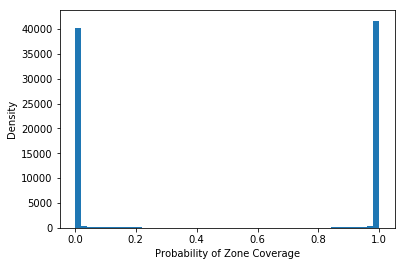

In [60]:
plt.pyplot.hist(full_probs, bins = 50)
plt.pyplot.xlabel('Probability of Zone Coverage')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [61]:
pass_attempt_df["zone_probability"] = full_probs
pass_attempt_df["zone_flag"] = full_classes

### Saving Results

In [62]:
pass_attempt_df_final = pass_attempt_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(pass_attempt_df.columns[[x.startswith('zone') for x in pass_attempt_df.columns]])].sort_values(['gameId', 'playId', 'position'])

In [63]:
pass_attempt_df_final

,week,gameId,playId,nflId,displayName,position,zone_probability,zone_flag
0,1,2018090600,75,2552689,Ronald Darby,CB,1.377183e-12,0
1,1,2018090600,75,2555383,Jalen Mills,CB,1.330787e-10,0
1,1,2018090600,75,2495613,Corey Graham,FS,1.000000e+00,1
2,1,2018090600,75,2534832,Rodney McLeod,FS,9.999976e-01,1
0,1,2018090600,75,79848,Malcolm Jenkins,SS,4.219296e-07,0
...,...,...,...,...,...,...,...,...
32493,17,2018123015,4057,2558009,Budda Baker,FS,3.030520e-11,0
52975,17,2018123015,4104,2495504,Patrick Peterson,CB,2.332915e-11,0
52976,17,2018123015,4104,2540170,David Amerson,CB,1.000000e+00,1
32494,17,2018123015,4104,2495807,Antoine Bethea,FS,1.000000e+00,1


In [65]:
pass_attempt_df_final.to_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/all_positions_pass_attempts_man_zone_classes.csv", 
                             index = False)

In [64]:
pass_attempt_df[(pass_attempt_df["gameId"] == 2018091001) & (pass_attempt_df["playId"] == 3175)]

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,off_dir_diff_between_ball_snap_and_pass_forward,best_cor_x_time_1,best_cor_x_time_1_2,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,cor_dist_inter,zone_probability,zone_flag
2791,1,2018091001,3175,306,Dominique Rodgers-Cromartie,CB,0.001030,1.828340,2.051745,4.374495,...,12.97,0.996619,0.996559,0.998397,0.998692,0.997508,0.997626,0.153284,3.289500e-13,0
2792,1,2018091001,3175,2495617,Leon Hall,CB,0.135594,0.287196,0.328063,0.468380,...,3.48,0.998389,0.997318,0.968616,0.943793,0.983503,0.970555,0.272477,1.016458e-10,0
2793,1,2018091001,3175,2558062,Gareon Conley,CB,0.000701,3.846437,3.800498,4.511040,...,36.12,0.844782,0.698956,0.977344,0.838391,0.911063,0.768673,0.203309,1.000000e+00,1
1752,1,2018091001,3175,2495153,Marcus Gilchrist,FS,0.001652,7.899735,6.650955,6.290162,...,56.72,0.492665,0.502859,0.946094,0.965273,0.719379,0.734066,0.106732,1.000000e+00,1
1753,1,2018091001,3175,2507167,Reggie Nelson,FS,0.117265,0.259386,0.022739,0.021646,...,5.81,0.999645,0.999365,0.986681,0.987296,0.993163,0.993330,0.105495,1.045320e-10,0


In [188]:
pass_attempt_df[(pass_attempt_df["gameId"] == 2018091001) & (pass_attempt_df["playId"] == 3175)][["displayName"] + \
                            list(pass_attempt_df.columns[['off_mean' in x for x in pass_attempt_df.columns]])]

,displayName,off_mean_time_0,off_mean_time_0_1,off_mean_time_1,off_mean_time_1_2,off_mean_time_2
2845,Dominique Rodgers-Cromartie,7.798373,6.844617,6.491374,5.734336,2.327666
2846,Leon Hall,3.834059,3.626730,3.549941,3.489269,3.216243
2847,Gareon Conley,6.413693,4.712647,4.082630,3.528868,1.036941
1831,Marcus Gilchrist,8.756698,5.904875,4.848645,4.479064,2.815952
1832,Reggie Nelson,8.323294,9.072465,9.349936,9.367771,9.448030


# Repeating for Sack Plays!

In [66]:
filter_col = [col for col in sacks_df if not '_o_' in col]
sacks_df = sacks_df[filter_col]

In [67]:
filter_col = [col for col in sacks_df if not 'facing' in col]
sacks_df = sacks_df[filter_col]

In [68]:
filter_col = [col for col in sacks_df if not 'var_y' in col]
sacks_df = sacks_df[filter_col]

In [69]:
filter_col = [col for col in sacks_df if not 'var_x' in col]
sacks_df = sacks_df[filter_col]

In [70]:
filter_col = [col for col in sacks_df if not 'def_mean_time_0' in col]
sacks_df = sacks_df[filter_col]

In [71]:
filter_col = [col for col in sacks_df if not 'def' in col]
sacks_df = sacks_df[filter_col]

In [72]:
filter_col = [col for col in sacks_df if not 'def_var_time_0' in col]
sacks_df = sacks_df[filter_col]

In [73]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'speed_var_time_0', 'speed_var_time_0_1', 'speed_var_time_1',
       'speed_mean_time_0', 'speed_mean_time_0_1', 'speed_mean_time_1',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_0', 'off_dir_var_time_0_1', 'off_dir_var_time_1',
       'off_dir_mean_time_0', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'rat_mean_time_0', 'rat_mean_time_0_1', 'rat_mean_time_1',
       'rat_var_time_0', 'rat_var_time_0_1', 'rat_var_time_1', 'cor_x_time_0',
       'cor_x_time_0_1', 'cor_x_time_1', 'cor_y_time_0', 'cor_y_time_0_1',
       'cor_y_time_1', 'cor_s_time_0', 'cor_s_time_0_1', 'cor_s_time_1',
       'cor_avg_x_y_time_0', 'cor_avg_x_y_time_0_1', 'cor_avg_x_y_time_1',
       'cor_rot_best_x_time_0', 'cor_rot_best_x_time_0_1',
       'cor_rot_best_x_time_1', 'cor_rot_best_y_time_0',
       'cor_rot_best_y

In [74]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('best' not in col) and ('s' not in col))]
sacks_df = sacks_df[filter_col]

In [75]:
filter_col = [col for col in sacks_df if not (('cor_rot' in col))]
sacks_df = sacks_df[filter_col]

In [76]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('time_0' in col))]
sacks_df = sacks_df[filter_col]

In [77]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('time_2' in col))]
sacks_df = sacks_df[filter_col]

In [78]:
filter_col = [col for col in sacks_df if not 'off_dir_var_time_0' in col]
sacks_df = sacks_df[filter_col]

In [79]:
filter_col = [col for col in sacks_df if not 'speed' in col]
sacks_df = sacks_df[filter_col]

In [80]:
sacks_df = sacks_df.drop(['cb_off_dir_diff_ball_snap', 'cb_off_dist_ball_snap',
                                       'off_dir_mean_time_0'
                                       ], axis = 1)

In [81]:
filter_col = [col for col in sacks_df if (not 'rat' in col)|('ratio_pass_forward' in col)]
sacks_df = sacks_df[filter_col]

In [82]:
filter_col = [col for col in sacks_df if (not '2' in col)]
sacks_df = sacks_df[filter_col]

In [83]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_1', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'cor_s_time_1', 'cb_off_dir_diff_qb_sack', 'cb_off_dist_qb_sack',
       'best_cor_x_time_1', 'best_cor_y_time_1', 'best_cor_x_y_avg_time_1'],
      dtype='object')

In [84]:
sacks_df["cor_dist_inter"] = (sacks_df["best_cor_x_y_avg_time_1"]**2)/sacks_df["off_mean_time_1"]
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].fillna(0)
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].replace([np.inf], \
                np.percentile(np.array(sacks_df["cor_dist_inter"]), 99))
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].replace([-np.inf], \
                np.percentile(np.array(sacks_df["cor_dist_inter"]), 1))

In [85]:
sacks_df.head(10)

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_mean_time_0,...,off_dir_var_time_1,off_dir_mean_time_0_1,off_dir_mean_time_1,cor_s_time_1,cb_off_dir_diff_qb_sack,cb_off_dist_qb_sack,best_cor_x_time_1,best_cor_y_time_1,best_cor_x_y_avg_time_1,cor_dist_inter
0,1,2018090600,776,2539334,Desmond Trufant,CB,0.000389,4.718561,5.473382,4.771215,...,514.650934,25.521875,17.195263,0.802340,37.12,11.512224,0.999221,0.993155,0.996188,0.156758
1,1,2018090600,776,2539653,Robert Alford,CB,0.000083,0.345370,0.251381,1.983317,...,236.038134,43.825208,13.468158,0.865475,21.84,0.890505,0.994428,0.981624,0.988026,0.931778
2,1,2018090600,839,2539334,Desmond Trufant,CB,0.019996,1.094198,1.178080,6.975783,...,52.918508,10.355593,7.144286,0.874752,4.38,4.687057,0.997203,0.996352,0.996778,0.163544
3,1,2018090600,839,2539653,Robert Alford,CB,0.000035,7.452315,8.463855,2.132386,...,530.482807,38.213051,41.381837,0.953466,11.56,1.568949,0.788554,0.750077,0.769315,0.151729
4,1,2018090600,839,2556445,Brian Poole,CB,0.080615,1.350028,1.574009,6.138672,...,3075.144862,52.003220,48.922041,0.116535,115.44,5.015117,0.922971,0.888392,0.905682,0.145306
5,1,2018090600,1568,2552689,Ronald Darby,CB,0.000058,10.208990,8.961597,9.037849,...,67.413851,7.592000,8.275500,0.894654,8.67,1.552192,0.994436,0.856548,0.925492,0.182354
6,1,2018090600,1568,2555383,Jalen Mills,CB,0.038938,2.510159,1.547464,4.623992,...,2037.377201,25.163000,26.567000,0.876558,9.47,0.889550,0.980798,0.990751,0.985775,0.530008
7,1,2018090600,1568,2557958,Sidney Jones,CB,0.482190,0.753213,0.523905,3.230003,...,425.069416,17.476200,11.718000,0.975121,4.31,1.185116,0.981283,0.999108,0.990195,0.490645
8,1,2018090600,3815,2552689,Ronald Darby,CB,0.000051,9.803451,8.094433,11.349277,...,282.765748,18.388113,20.316279,0.880891,6.99,4.393290,0.990762,0.904859,0.947810,0.132611
9,1,2018090600,3815,2555383,Jalen Mills,CB,0.000510,3.415404,3.359826,9.701411,...,304.011646,34.422075,22.467907,0.961576,43.73,11.496617,0.979095,0.952453,0.965774,0.123036


In [86]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_1', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'cor_s_time_1', 'cb_off_dir_diff_qb_sack', 'cb_off_dist_qb_sack',
       'best_cor_x_time_1', 'best_cor_y_time_1', 'best_cor_x_y_avg_time_1',
       'cor_dist_inter'],
      dtype='object')

### Preparing Train/Test Groups

In [87]:
weeks_exclude = [1, 2, 3]
train = sacks_df[[x not in weeks_exclude for x in list(sacks_df["week"])]]
test = sacks_df[[x in weeks_exclude for x in list(sacks_df["week"])]]

In [88]:
X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

In [89]:
print(X_train.shape)
print(X_test.shape)

(5002, 16)
(1105, 16)


### Fitting GMM Model

In [90]:
# train
clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_train = clf_train.fit(X_train)

In [91]:
# test
clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_test = clf_test.fit(X_test)

### Examining Cluster Results

In [92]:
def get_cluster_means(X, f):
    cluster_means = {}
    for iCnt in range(len(X.columns)):
        cluster_means.update({X.columns[iCnt]:(f.means_[0][iCnt],f.means_[1][iCnt])})
    return cluster_means

In [93]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.9853014762710323, 0.821367607572445),
 'best_cor_x_y_avg_time_1': (0.9774283561003013, 0.8013035789766353),
 'best_cor_y_time_1': (0.96955523592957, 0.7812395503808254),
 'cb_off_dir_diff_qb_sack': (20.926085502183494, 49.23341196067862),
 'cb_off_dist_qb_sack': (3.459339957451324, 6.4194304919051115),
 'cor_dist_inter': (0.35226048551006556, 0.11030304547356305),
 'cor_s_time_1': (0.8604521701578127, 0.6214226489819943),
 'off_dir_mean_time_0_1': (34.41658620215814, 56.35621212023103),
 'off_dir_mean_time_1': (22.338351517815777, 49.53526648506586),
 'off_dir_var_time_1': (758.5179269372616, 1497.9163317733824),
 'off_mean_time_0': (6.661796572149317, 10.973599169147993),
 'off_mean_time_0_1': (5.026657965834637, 8.849134888184897),
 'off_mean_time_1': (4.6335159226174225, 8.369035451722434),
 'off_var_time_0': (0.042642681032252064, 0.06503043287544039),
 'off_var_time_0_1': (3.345359493611976, 9.505067899258467),
 'off_var_time_1': (3.0089238509546163, 8.864

### Computing Rand Index

In [94]:
from sklearn.metrics import adjusted_rand_score

In [95]:
y_train = f_train.predict(X_test)
y_test = f_test.predict(X_test)

In [96]:
adjusted_rand_score(y_train, y_test)

0.7976456757299162

### Iterating Through To Get Cross-Validation Scores

In [97]:
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
G_vect = [2, 3, 4, 5, 6, 7, 8, 9]
rand_index_G_vect = []

In [168]:
for G in G_vect:
    rand_index_sum = 0
    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = sacks_df[[x not in weeks_exclude for x in list(sacks_df["week"])]]
        test = sacks_df[[x in weeks_exclude for x in list(sacks_df["week"])]]

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=G, covariance_type='full', 
                                            n_init = 2, max_iter = 200)
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=G, covariance_type='full',
                                           n_init = 2, max_iter = 200)
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_G_vect.append(rand_index)
    
    print(rand_index)

0.561473542556974
0.5919062575596064
0.30586623608636493
0.24604490768222553
0.27733097122708683
0.3169831472245106
0.3310993168172608
0.29090753264663544


### Plot eliminating x/y var, speed, and def based variables, replacing Ratio with Cor

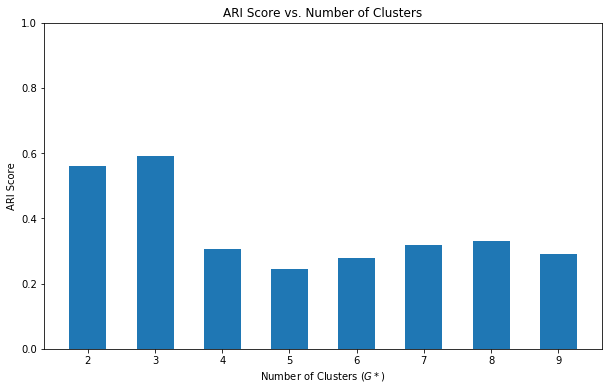

In [169]:
plt.pyplot.figure(figsize=(10, 6))
# plotting the results
plt.pyplot.bar(x = G_vect,
               height = rand_index_G_vect,
               width = .55)
plt.pyplot.xlabel('Number of Clusters ($G*$)')
plt.pyplot.ylabel('ARI Score')
plt.pyplot.ylim(0,1)
plt.pyplot.title('ARI Score vs. Number of Clusters')
plt.pyplot.show()

### Feature Importance

In [170]:
import sys
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
feature_list = list(X_train.columns)
rand_index_vect = []

# making a waitbar
toolbar_width = len(feature_list)

In [171]:
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1))

for feature in feature_list:
    
    rand_index_sum = 0

    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = sacks_df[[x not in weeks_exclude for \
                                 x in list(sacks_df["week"])]].drop([feature], axis = 1)
        test = sacks_df[[x in weeks_exclude for \
                                x in list(sacks_df["week"])]].drop([feature], axis = 1)

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_vect.append(rand_index)
    
    sys.stdout.write("-")
    sys.stdout.flush()

[                ----------------

In [172]:
d = {'feature': feature_list, 'delta_ARI': rand_index_G_vect[0] - np.array(rand_index_vect)}
feature_imp_df = pd.DataFrame(data=d).sort_values('delta_ARI', ascending = False)
feature_imp_df["base_feature"] = [x.split('_pass_forward')[0] if "pass_forward" in x \
                                  else x.split('_ball_snap')[0] if "ball_snap" in x \
                                  else x.split('_time')[0] for x in np.array(feature_imp_df["feature"])]
feature_imp_df["time_period"] = ["Before Ball Thrown" if "pass_forward" in x \
                                 else "Before Ball Thrown" if "ball_snap" in x \
                                 else "After Ball Thrown" if x.endswith("2") \
                                 else "Before Ball Thrown" for x in np.array(feature_imp_df["feature"])]
feature_imp_df["feature"] = [x.upper() for x in feature_imp_df["feature"]]

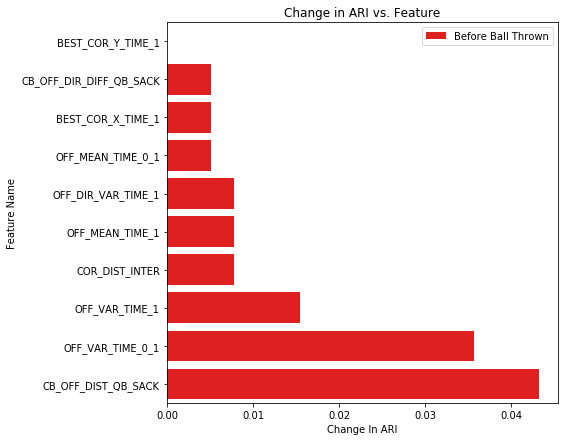

In [173]:
plt.pyplot.figure(figsize=(7,7))

sns.barplot(x="delta_ARI", y="feature", data=feature_imp_df.head(10).sort_values('delta_ARI', ascending = True),
            hue = "time_period", dodge = False, palette = ["red", "blue"])
plt.pyplot.gca().legend().set_title('')
plt.pyplot.title('Change in ARI vs. Feature')
plt.pyplot.ylabel('Feature Name')
plt.pyplot.xlabel('Change In ARI')
plt.pyplot.show()

### Scoring All Plays

In [98]:
sacks_df

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_mean_time_0,...,off_dir_var_time_1,off_dir_mean_time_0_1,off_dir_mean_time_1,cor_s_time_1,cb_off_dir_diff_qb_sack,cb_off_dist_qb_sack,best_cor_x_time_1,best_cor_y_time_1,best_cor_x_y_avg_time_1,cor_dist_inter
0,1,2018090600,776,2539334,Desmond Trufant,CB,0.000389,4.718561,5.473382,4.771215,...,514.650934,25.521875,17.195263,0.802340,37.12,11.512224,0.999221,0.993155,0.996188,0.156758
1,1,2018090600,776,2539653,Robert Alford,CB,0.000083,0.345370,0.251381,1.983317,...,236.038134,43.825208,13.468158,0.865475,21.84,0.890505,0.994428,0.981624,0.988026,0.931778
2,1,2018090600,839,2539334,Desmond Trufant,CB,0.019996,1.094198,1.178080,6.975783,...,52.918508,10.355593,7.144286,0.874752,4.38,4.687057,0.997203,0.996352,0.996778,0.163544
3,1,2018090600,839,2539653,Robert Alford,CB,0.000035,7.452315,8.463855,2.132386,...,530.482807,38.213051,41.381837,0.953466,11.56,1.568949,0.788554,0.750077,0.769315,0.151729
4,1,2018090600,839,2556445,Brian Poole,CB,0.080615,1.350028,1.574009,6.138672,...,3075.144862,52.003220,48.922041,0.116535,115.44,5.015117,0.922971,0.888392,0.905682,0.145306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,17,2018123015,3734,2495807,Antoine Bethea,FS,0.012140,3.566140,3.681929,8.620985,...,130.284765,45.588667,17.440000,0.959236,41.56,4.121019,0.998296,0.976304,0.987300,0.147583
2308,17,2018123015,3734,2543830,Tre Boston,FS,0.068163,4.024274,4.449628,7.473905,...,1362.584561,56.774000,44.654571,0.910430,18.32,14.767383,0.986064,0.647601,0.816832,0.071955
2309,17,2018123015,3734,2558009,Budda Baker,FS,0.004576,2.587151,3.336334,2.545003,...,622.998302,35.347333,36.604857,0.708743,110.09,8.273041,0.988237,0.888347,0.938292,0.319031
2310,17,2018123015,3932,2539243,Bradley McDougald,SS,0.000030,28.891813,27.140984,16.001915,...,225.475878,36.777895,19.352128,0.794200,23.76,0.908020,0.935466,0.985401,0.960433,0.099099


In [99]:
# sampling 45,000 plays to be within CPU limit
X_train = sacks_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_train.shape

(6107, 16)

In [100]:
# all plays to score
X_score = sacks_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_score.shape

(6107, 16)

In [101]:
# train
clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_train = clf_train.fit(X_train)

In [102]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.8161364535286018, 0.9856522870417891),
 'best_cor_x_y_avg_time_1': (0.7990346543610695, 0.977067361925995),
 'best_cor_y_time_1': (0.781932855193537, 0.968482436810201),
 'cb_off_dir_diff_qb_sack': (48.59426609375501, 21.533601521721568),
 'cb_off_dist_qb_sack': (6.401470494118663, 3.4975340133721136),
 'cor_dist_inter': (0.11003133375061298, 0.3517426859697026),
 'cor_s_time_1': (0.6183328074718797, 0.8621786542773768),
 'off_dir_mean_time_0_1': (56.38401562663817, 34.39435052393106),
 'off_dir_mean_time_1': (49.626650951419826, 22.28825390133307),
 'off_dir_var_time_1': (1492.7132587120532, 756.0999706922933),
 'off_mean_time_0': (10.963391385336264, 6.630022372318201),
 'off_mean_time_0_1': (8.824447824763658, 5.028300072117278),
 'off_mean_time_1': (8.340368395782793, 4.6419018424977585),
 'off_var_time_0': (0.06445516527913978, 0.04222457489385611),
 'off_var_time_0_1': (9.527657869328754, 3.257309265575082),
 'off_var_time_1': (8.869786778555618, 2.931526

In [103]:
full_probs = [x[0] for x in f_train.predict_proba(X_score)]
full_classes = 1 - f_train.predict(X_score)

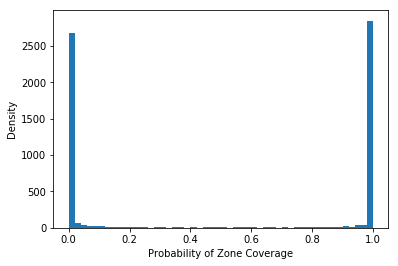

In [104]:
plt.pyplot.hist(full_probs, bins = 50)
plt.pyplot.xlabel('Probability of Zone Coverage')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [105]:
sacks_df["zone_probability"] = full_probs
sacks_df["zone_flag"] = full_classes

### Saving Results

In [106]:
sacks_df_final = sacks_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(sacks_df.columns[[x.startswith('zone') for x in sacks_df.columns]])].sort_values(['gameId','playId','position'])

In [107]:
sacks_df_final

,week,gameId,playId,nflId,displayName,position,zone_probability,zone_flag
0,1,2018090600,776,2539334,Desmond Trufant,CB,1.000000e+00,1
1,1,2018090600,776,2539653,Robert Alford,CB,5.202723e-65,0
1,1,2018090600,776,2555543,Keanu Neal,FS,1.000000e+00,1
0,1,2018090600,776,2543850,Ricardo Allen,SS,3.427258e-01,0
2,1,2018090600,839,2539334,Desmond Trufant,CB,1.871693e-05,0
...,...,...,...,...,...,...,...,...
3793,17,2018123015,3932,2553456,Akeem King,CB,1.692050e-10,0
3794,17,2018123015,3932,2553637,Justin Coleman,CB,5.936352e-05,0
3795,17,2018123015,3932,2560728,Tre Flowers,CB,3.571320e-05,0
2310,17,2018123015,3932,2539243,Bradley McDougald,SS,1.000000e+00,1


In [108]:
sacks_df_final.to_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/all_positions_sacks_man_zone_classes.csv", 
                      index = False)

In [1]:
sacks_df[(sacks_df["gameId"] == 2018090901) & (sacks_df["playId"] == 2885)]

NameError: name 'sacks_df' is not defined

In [186]:
sacks_df[(sacks_df["gameId"] == 2018090901) & (sacks_df["playId"] == 2885)][["displayName"] + \
                            list(sacks_df.columns[['cor_s' in x for x in sacks_df.columns]])]

,displayName,cor_s_time_1
